# Quantization and Dequantization in PyTorch
* Notebook by Adam Lang
* Date: 1/17/25

# Overview
* Quantization and dequantization techniques in PyTorch Tensors.
* These are building blocks for quantization of LLMs when fine-tuning.

In [1]:
import torch

# How to Quantize a Tensor
* Goal: 32 bit precision tensors, we want to quantize them.
* Great article on weight quantization in torch: https://towardsdatascience.com/introduction-to-weight-quantization-2494701b9c0c
* This is the scaling equation:

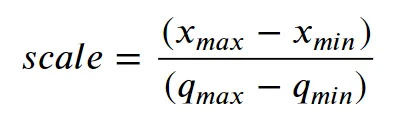

In [2]:
## create tensor
tensor = torch.tensor([-300, 100, 500], dtype=torch.float32)
tensor

tensor([-300.,  100.,  500.])

In [5]:
## quantization!
def quantize(tensor, target_dtype):
  """
  Function takes in a tensor and target_dtype and quantizes them.
  """
  ## first check if 8-bit precision or unsigned 8 bit
  if target_dtype in [torch.int8, torch.uint8]:
    q_min, q_max = torch.iinfo(target_dtype).min, torch.iinfo(target_dtype).max
  else:
    q_min, q_max = torch.iinfo(target_dtype).min, torch.finfo(target_dtype).max

  ## r min and r max
  r_min, r_max = tensor.min(), tensor.max()

  ## scaling formula
  scale = (r_max - r_min) / (q_max - q_min)
  zero_pt = (q_min - r_min / scale)

  ## fully quantized tensor
  ## still 32 bit --> cast to 8 bit precision
  quantized_tensor = (tensor / scale + zero_pt).to(target_dtype)

  return quantized_tensor, scale, zero_pt

## use quantize function
quantized_tensor, scale, zero_pt = quantize(tensor, target_dtype=torch.int8)
print(f"Quantized Tensor: {quantized_tensor}\n")
print(f"Scale: {scale}\n")
print(f"Zero Point: {zero_pt}")



Quantized Tensor: tensor([-128,    0,  127], dtype=torch.int8)

Scale: 3.1372549533843994

Zero Point: -32.375


## Summary
* The min and max values of the tensor are now quantized within the scaled symmetric range.

# Dequantization of a Tensor

In [6]:
## dequantize tensor
def dequantize(quantized_tensor, scale, zero_pt):
  return scale * (quantized_tensor.to(torch.float32) - zero_pt)

## apply function
dequantized_tensor = dequantize(quantized_tensor, scale, zero_pt)
print(f"De-quantized Tensor: {dequantized_tensor}")

De-quantized Tensor: tensor([-300.0000,  101.5686,  500.0000])
